# Kir Basal Spine Analysis

### Notebook for processing and analyzing Kir spine data from basal dendrites

In [1]:
# Configure Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Import packages and modules
import os 
import numpy as np
from Lab_Analyses.Kir_Analysis.preprocess_kir_spine_data import organize_kir_spine_data
from Lab_Analyses.Kir_Analysis.kir_spine_activity_analysis import kir_spine_activity_analysis
from Lab_Analyses.Kir_Analysis.kir_spine_coactivity_analysis import kir_spine_coactivity_analysis

from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils
from Lab_Analyses.Spine_Analysis_v2.spine_activity_dataclass import Grouped_Spine_Activity_Data
from Lab_Analyses.Spine_Analysis_v2.local_coactivity_dataclass import Grouped_Local_Coactivity_Data
from Lab_Analyses.Kir_Analysis import kir_spine_utilities as k_utils
from Lab_Analyses.Kir_Analysis.kir_spine_activity_dataclass import Grouped_Kir_Spine_Activity_Data
from Lab_Analyses.Kir_Analysis.kir_spine_coactivity_dataclass import Grouped_Kir_Coactivity_Data
from Lab_Analyses.Kir_Analysis import kir_spine_plotting as plotting

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Datasets
Specify the mice to be analyzed and other parameters

In [14]:
# Mouse ids
id_1 = "JW264"
id_2 = "JW276"
id_3 = "JW282"
id_4 = "JW295"
id_5 = "JW311"

mouse_list = [id_1, id_2, id_3, id_4, id_5]

# FOV type
fov_type = "basal"

# Preprocessing parameters
reprocess = True
resmooth = True
redetection = True
followup=True
plot_norm=True

# Analysis parameters
activity_window = (-2,4) ## In seconds
zscore = False
volume_norm = True
extend_dendrite = None
cluster_dist = 10
days = ["Early", "Middle"]
movement_periods = [None, "movement", "nonmovement"]
partners = None
save_ind = True
save_grouped = False

## Preprocess data

In [ ]:
# Preprocess and reorganize the imaging datasets
for mouse in mouse_list:
    organize_kir_spine_data(
        mouse,
        fov_type=fov_type,
        redetection=redetection,
        resmooth=resmooth,
        reprocess=reprocess,
        save=True,
        followup=followup,
    )

## Data analysis

### Spine Activity

In [ ]:
# Perform spine- and dendrite-centric analysis
for day in days:
    print(f"================ {day} =================")
    kir_spine_activity_analysis(
        mice_list=mouse_list,
        session=day,
        fov_type=fov_type,
        activity_window=activity_window,
        zscore=zscore,
        save_ind=save_ind,
        save_grouped=save_grouped
    )
    print(f"======================================")

### Local Coactivity

In [ ]:
# Perform local coactivity analysis
for day in days:
    print(f" {day} ".center(40, "#"))
    for movement in movement_periods:
        if movement is None:
            print(" ALL PERIODS ".center(40,"="))
        else:
            print(f" {movement.upper()} ".center(40,"="))
        kir_spine_coactivity_analysis(
            mice_list=mouse_list,
            session=day,
            fov_type=fov_type,
            activity_window=activity_window,
            cluster_dist=cluster_dist,
            zscore=zscore,
            partners=partners,
            movement_period=movement,
            save_ind=save_ind,
            save_grouped=save_grouped
        )
        print("========================================")
    print(f"########################################")

## Visualize the data


In [4]:
# Set up the control mice
ctl_2 = "JW153"
ctl_3 = "JW154"
ctl_4 = "JW167"
ctl_5 = "JW168"
ctl_6 = "JW169"
ctl_7 = "JW193"
ctl_8 = "JW205"
ctl_9 = "JW206"
ctl_10 = "JW213"
ctl_11 = "JW215"
ctl_12 = "JW270"
ctl_13 = "JW280"
ctl_14 = "JW306"

ctl_mouse_list = [ctl_2, ctl_3, ctl_4, ctl_5, ctl_6, ctl_7, ctl_8, ctl_9, ctl_10, ctl_11, ctl_12, ctl_14]

In [15]:
# Load the dataset
## Control data
early_ctl_activity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Activity",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=ctl_mouse_list,
    fov_type="basal",
    period=None,
    partner=None,
)
early_ctl_activity_data = Grouped_Spine_Activity_Data(early_ctl_activity_data)

e_ctl_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Local",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=ctl_mouse_list,
    fov_type="basal",
    period=None,
    partner=None,
)
e_ctl_coactivity_data = Grouped_Local_Coactivity_Data(e_ctl_coactivity_data)

## Kir data
early_kir_activity_data = k_utils.batch_load_individual_kir_analyzed_datasets(
    type="Activity",
    session="Early",
    activity_type="dFoF",
    mice_list=mouse_list,
    fov_type="basal",
    period=None,
    partner=None,
)
early_kir_activity_data = Grouped_Kir_Spine_Activity_Data(early_kir_activity_data)

e_kir_coactivity_data = k_utils.batch_load_individual_kir_analyzed_datasets(
    type="Coactivity",
    session="Early",
    activity_type="dFoF",
    mice_list=mouse_list,
    fov_type="basal",
    period=None,
    partner=None,
)
e_kir_coactivity_data = Grouped_Kir_Coactivity_Data(e_kir_coactivity_data)

In [ ]:
figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\Kir_Spine_Imaging\Plasticity\basal"

### Basic Properties

In [ ]:
plotting.plot_kir_vs_ctl_basic_props(
    kir_activity_dataset=early_kir_activity_data,
    ctl_activity_dataset=early_ctl_activity_data,
    kir_coactivity_dataset=e_kir_coactivity_data,
    ctl_coactivity_dataset=e_ctl_coactivity_data,
    fov_type="basal",
    figsize=(15,8),
    threshold=(0.25, 0.5),
    showmeans=True,
    hist_bins=30,
    test_type="parametric",
    save=True,
    save_path=figure_path,
)

Spine groups: {'sLTP': 12, 'sLTD': 93, 'Stable': 140}


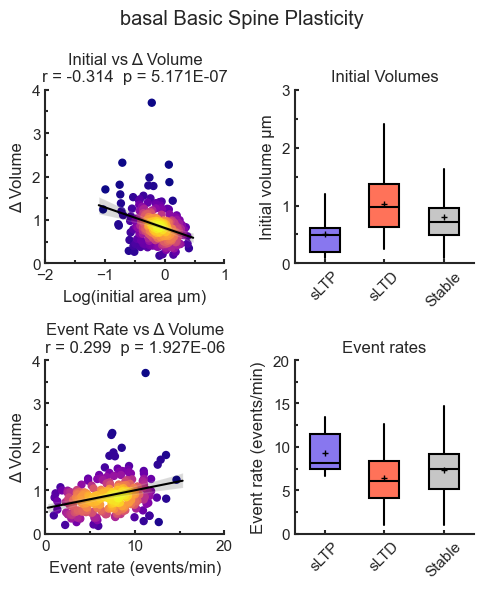

In [16]:
plotting.plot_kir_spine_plasticity(
    dataset=early_kir_activity_data,
    fov_type="basal",
    exclude="Shaft Spine",
    MRSs=None,
    threshold=(0.25, 0.5),
    figsize=(5,6),
    showmeans=True,
    test_type="nonparametric",
    test_method="holm-sidak",
    display_stats=True,
    save=False,
    save_path=None,
)

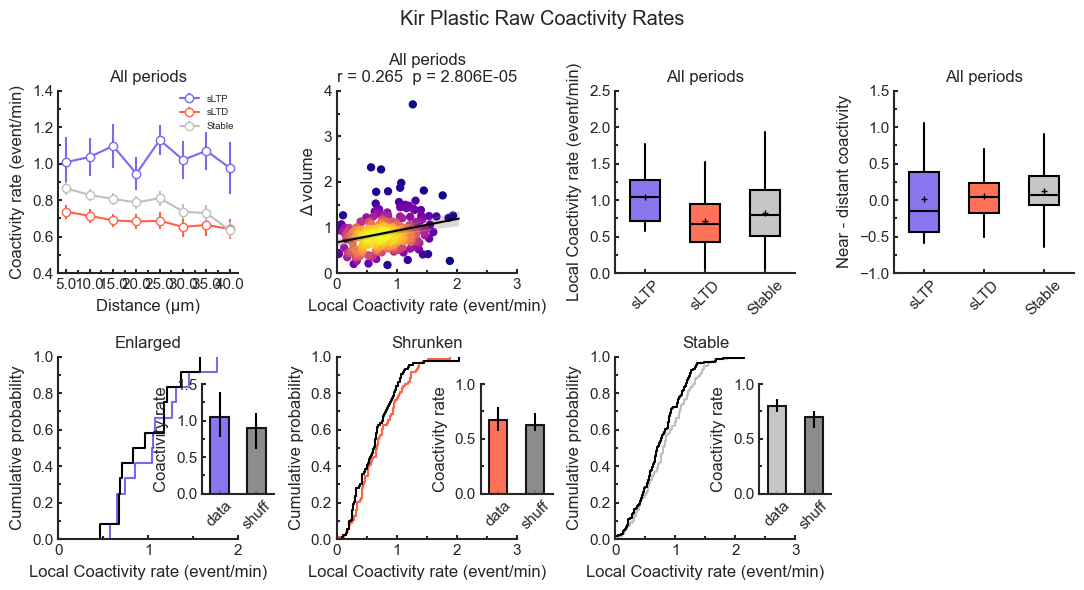

In [17]:
plotting.plot_kir_coactivity_plasticity(
    dataset=e_kir_coactivity_data,
    MRSs=None,
    norm=False,
    exclude="Shaft Spine",
    threshold=(0.25, 0.5),
    figsize=(11,6),
    showmeans=True,
    mean_type="median",
    err_type="CI",
    test_type="nonparametric",
    test_method="holm-sidak",
    display_stats=True,
    save=False,
    save_path=None,
)

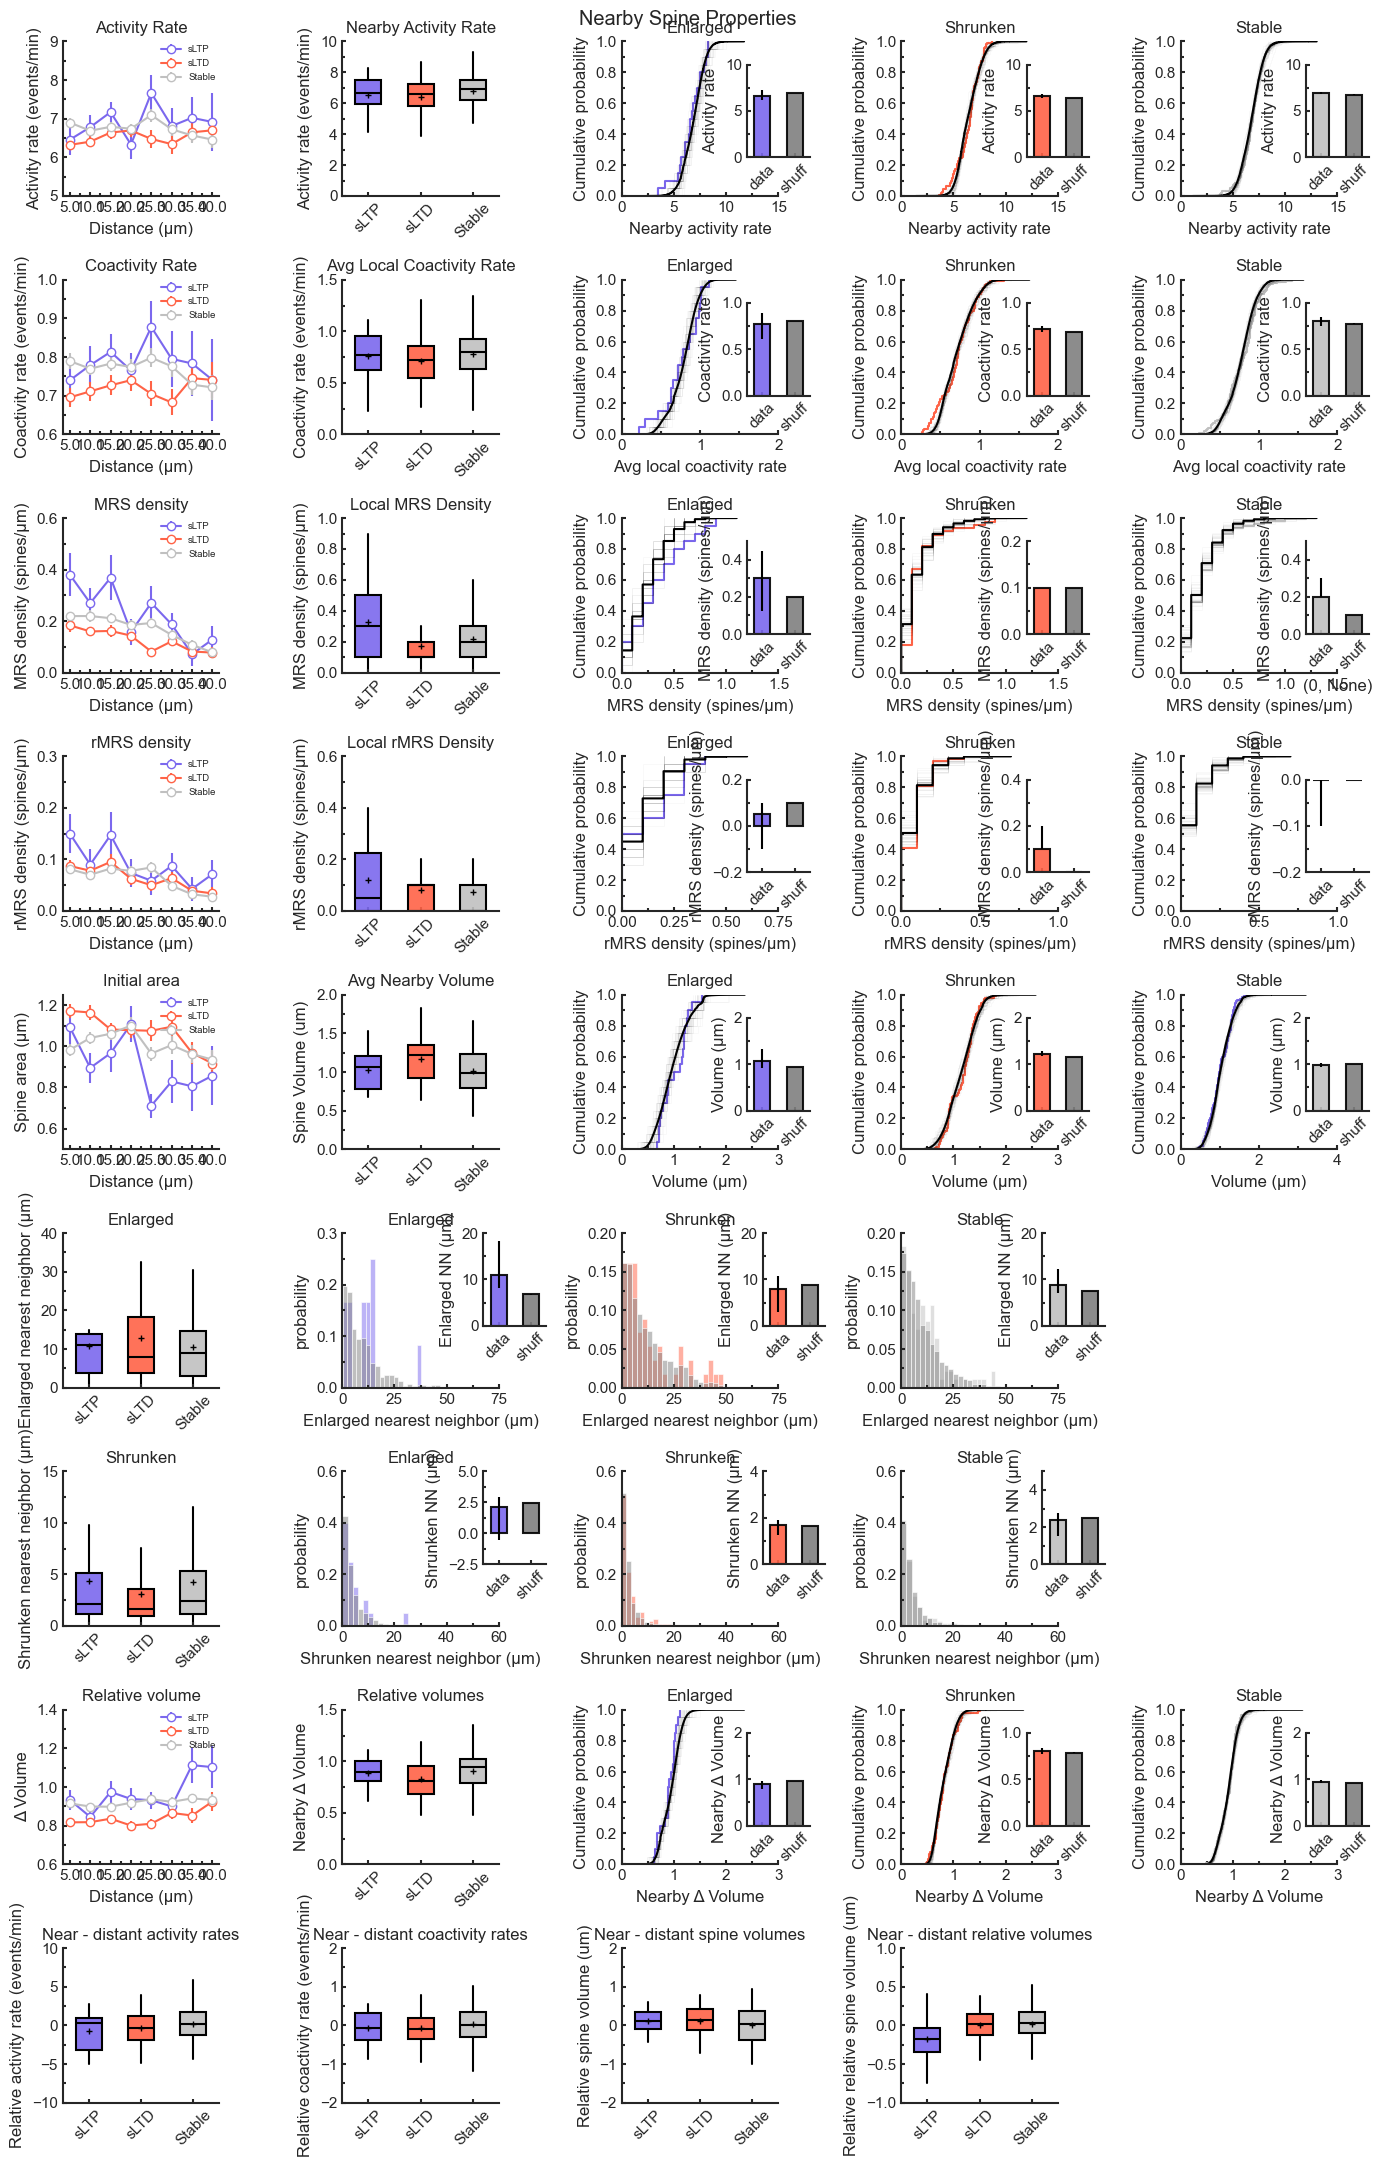

In [18]:
plotting.plot_nearby_spine_properties(
    dataset=e_kir_coactivity_data,
    followup_dataset=None,
    MRSs=None,
    exclude="Shaft",
    threshold=(0.25,0.5),
    figsize=(14,22),
    mean_type="median",
    err_type="CI",
    showmeans=True,
    hist_bins=25,
    test_type="nonparametric",
    test_method="holm-sidak",
    display_stats=True,
    vol_norm=False,
    save=False,
    save_path=None,
)

In [ ]:
from scipy import stats
#Ctl: sLTP 56; sLTD 78; Stable 272
#KIR: sLTP 10; sLTD 41; Stable 104

table = np.array([[56, 10],
                  [78, 41],
                  [272, 104]])
#print(stats.fisher_exact(table))
print(stats.chi2_contingency(table, correction=False))

In [ ]:
a = ["JW167", "JW167", "JW140", "JW140"]
b = np.unique(a)
b

In [ ]:
def code_str_to_int(str_list):
    temp = defaultdict(lambda: len(temp))
    int_list = [temp[ele] for ele in str_list]

    return int_list

In [ ]:
from collections import defaultdict
new_a = code_str_to_int(a)
new_a

In [ ]:
codes = code_str_to_int(b)

In [ ]:
codes

In [ ]:
d = {}
for s, c in zip(b, codes):
    d[s] = c
d

In [ ]:
coded_a = [d[v] for v in a]
coded_a